In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_table("allglycans_aa.txt")
print(df)

                Analyte Area  y          H3N2        H3N2F1         H4N2  \
0     k1_dhb_rep1_0_L23_1.xy  1   3163.357481   4885.690634  3670.847746   
1     k1_dhb_rep2_0_L24_1.xy  1   2682.009781   3283.915197  2969.171610   
2      k1_dhb_rep3_0_B7_1.xy  1   1011.698875   2374.803114  1685.586602   
3      k1_dhb_rep4_0_B8_1.xy  1   2029.285562   5595.328580  2722.394593   
4    k10_dhb_rep1_0_M11_1.xy  1   5171.100202  14595.628740  7797.227203   
..                       ... ..           ...           ...          ...   
247    s8_dhb_rep4_0_D2_1.xy  0   1567.062202   4073.686898  2621.816799   
248   s9_dhb_rep1_0_O13_1.xy  0   8349.103468  14004.809700  9654.484786   
249   s9_dhb_rep2_0_O14_1.xy  0   8690.188166  14777.650960  9451.542956   
250   s9_dhb_rep3_0_D23_1.xy  0   2341.423443   3646.608695  2693.688124   
251   s9_dhb_rep4_0_D24_1.xy  0  10623.247900  12324.377490  8883.824583   

             H3N3       H4N2F1          H5N2        H3N3F1          H4N3  ...  \
0     

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Analyte Area  252 non-null    object 
 1   y             252 non-null    int64  
 2   H3N2          252 non-null    float64
 3   H3N2F1        252 non-null    float64
 4   H4N2          252 non-null    float64
 5   H3N3          252 non-null    float64
 6   H4N2F1        252 non-null    float64
 7   H5N2          252 non-null    float64
 8   H3N3F1        252 non-null    float64
 9   H4N3          252 non-null    float64
 10  H3N4          252 non-null    float64
 11  H6N2          252 non-null    float64
 12  H4N3F1        252 non-null    float64
 13  H5N3          252 non-null    float64
 14  H3N4F1        252 non-null    float64
 15  H4N4          252 non-null    float64
 16  H3N5          252 non-null    float64
 17  H7N2          252 non-null    float64
 18  H4N3S1        252 non-null    

In [3]:
df.drop('H5N4S1F1.1', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Analyte Area  252 non-null    object 
 1   y             252 non-null    int64  
 2   H3N2          252 non-null    float64
 3   H3N2F1        252 non-null    float64
 4   H4N2          252 non-null    float64
 5   H3N3          252 non-null    float64
 6   H4N2F1        252 non-null    float64
 7   H5N2          252 non-null    float64
 8   H3N3F1        252 non-null    float64
 9   H4N3          252 non-null    float64
 10  H3N4          252 non-null    float64
 11  H6N2          252 non-null    float64
 12  H4N3F1        252 non-null    float64
 13  H5N3          252 non-null    float64
 14  H3N4F1        252 non-null    float64
 15  H4N4          252 non-null    float64
 16  H3N5          252 non-null    float64
 17  H7N2          252 non-null    float64
 18  H4N3S1        252 non-null    

In [5]:
B=df[df.y==0]
M=df[df.y==1]

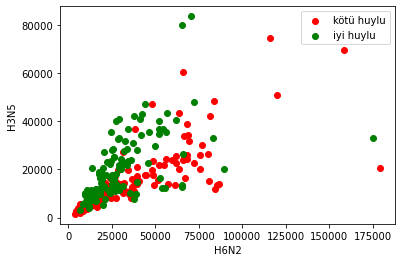

In [6]:
plt.scatter(M.H6N2,M.H3N5,color="red",label="kötü huylu")
plt.scatter(B.H6N2,B.H3N5,color="green",label="iyi huylu")
plt.xlabel("H6N2")
plt.ylabel("H3N5")
plt.legend()
plt.show()

In [7]:
df["y"]

0      1
1      1
2      1
3      1
4      1
      ..
247    0
248    0
249    0
250    0
251    0
Name: y, Length: 252, dtype: int64

In [8]:
y=df.y.values
x_data=df.drop(["y","Analyte Area"],axis=1)

In [9]:
#x=x_data

#Normalizasyon
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.8627450980392157


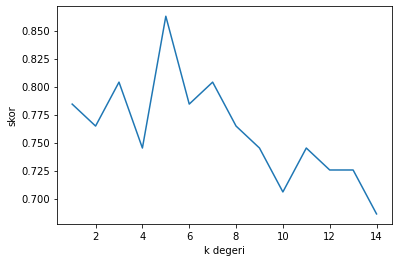

In [47]:
score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k degeri")
plt.ylabel("skor")
plt.show()

## SVM

In [12]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("svm score:",svm.score(x_test,y_test))

svm score: 0.8431372549019608


## Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

print("dt score:",dt.score(x_test,y_test))

dt score: 0.5098039215686274


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, random_state=1)
rf.fit(x_train,y_train)

print("rf score:",rf.score(x_test,y_test))

rf score: 0.8431372549019608


## KFOLD

In [20]:
#KNN
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=knn,X=x_data,y=y,cv=5)
    
for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.49019607843137253
0.6470588235294118
0.5
0.68
0.62
ortalama skor: 0.5874509803921569


In [46]:
#SVM
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=svm,X=x_data,y=y,cv=10)
    
for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.5769230769230769
0.6538461538461539
0.68
0.68
0.64
0.64
0.8
0.56
0.64
0.84
ortalama skor: 0.6710769230769231


In [48]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=dt,X=x_data,y=y,cv=5)
    
for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.7450980392156863
0.7058823529411765
0.7
0.78
0.74
ortalama skor: 0.7341960784313727


In [31]:
#RFA
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=rf,X=x_data,y=y,cv=8)
    
for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores))

0.8125
0.90625
0.75
0.84375
0.6451612903225806
0.8709677419354839
0.8387096774193549
0.7096774193548387
ortalama skor: 0.7971270161290323
